# Tarea 1
__Curso:__ Aprendizaje Automático 2020 

__Programa:__ MIIIO/DIIIO/DISC

__Profesor:__ Gonzalo Ruz

__Ayudante:__ Anthony Cho

## Instrucciones
* La tarea es individual
* Por favor responder en este mismo notebook
* Renombrar el archivo agregando su nombre, por ejemplo tarea1_Beto_Acosta.ipynb
* Subir el archivo al link de entrega Tarea 1 en webcursos que será habilitado
* __Fecha de entrega:__ viernes 31 de julio, 23:55 hrs.

Considere el dataset wine (un clásico parecido a iris)

In [1]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()
#print(wine_dataset.keys())
#print(wine_dataset['DESCR'])

## Pregunta 1
Realice una partición aleatoria para generar un conjunto de entrenamiento, validación, y prueba. Utilice un enfoque de Grid Search para encontrar el valor de k más apropiado para un clasificador knn. Para el valor de k encontrado, evalúe en el conjunto de prueba, entregando la matriz de confusión, accuracy, precision, recall, y F1-score. Para qué tipo de vino (clase), el clasificador tiene más problemas para clasificar, justifique su respuesta. 

### Respuesta:

In [18]:
#Librerias requeridas para las distintas respuestas:

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,classification_report
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import random, math
import warnings
warnings.filterwarnings('ignore')
random.seed(7)
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from numpy import linspace

In [3]:
#Hacemos Naive way of GridSearch, donde no usamos GridSearchCV, pues usa crossvalidation

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    wine_dataset.data, wine_dataset.target, random_state=7) #Fijamos la semilla en 7.

# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=0)

# #Estandarizamos los datos:
scale = StandardScaler().fit(X_train)
X_test = scale.transform(X_test)
X_trainval= scale.transform(X_trainval)
X_train= scale.transform(X_train)


#Vemos los size de cada set
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0 #Variable axuliar para guardar el mejor score y asi obtener la mejor k
#Parametro K
k=list(range(1,100)) #Es una grid de numeros que conocemos, en este caso una lista del 1 al 100
for n_neighbors in k:
    #Hacemos el train
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    #Evaluamos
    score=knn.score(X_valid, y_valid)
    #Nos quedamos con el mejor score
    if score > best_score:
            best_score = score
            best_parameters = {'n_neighbors': n_neighbors}
    #print("paso", score) #chequee si el for funcionaba correctamente y observe los scores
            
#Usamos el mejor K y evaluamos en el test set
knn=KNeighborsClassifier(**best_parameters)
knn.fit(X_trainval, y_trainval)
test_score = knn.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters, "NUESTRO K A UTILIZAR")
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 99   size of validation set: 34   size of test set: 45

Best score on validation set: 0.29
Best parameters:  {'n_neighbors': 1} NUESTRO K A UTILIZAR
Test set score with best parameters: 0.98


MATRIZ DE CONFUSION:


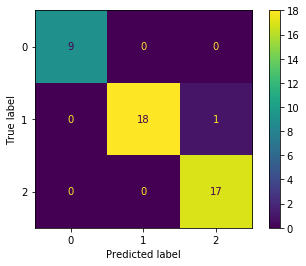

RESUMEN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [5]:
knn = KNeighborsClassifier(n_neighbors=1) #Usamos el K obtenido anteriormente.
knn.fit(X_trainval, y_trainval)
y_pred = knn.predict(X_test)
#print("MATRIZ DE CONFUSION(y_test, y_pred): \n", confusion_matrix(y_test, y_pred)) No usamos esta pues es menos estetica
#En cambio usamos esta que es mas facil visualizar
print("MATRIZ DE CONFUSION:")
plot_confusion_matrix(knn, X_test, y_test)
plt.show()
print('RESUMEN')
print(classification_report(y_test, y_pred))


###### -
Con ayuda del codigo expuesto en la Ayudantia 2, efectuada por Anthony C. Podemos visualizar otras metricas de relevancia, como lo son la precision y el recall de manera grafica.

Se implementa un k desde 1 hasta 50, para asi visualizar que k=1 es realmente la mejor opción.

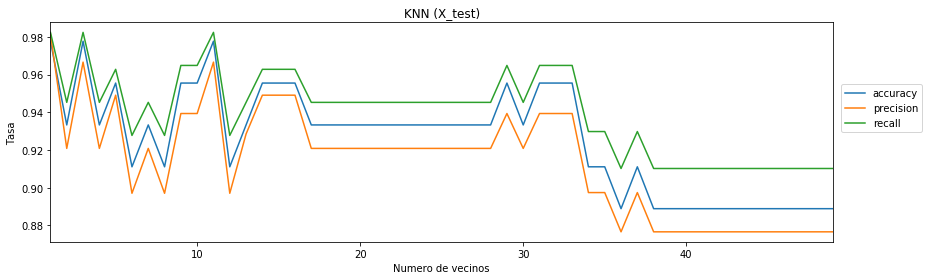

In [6]:
nVecinos = range(1, 50) #Usamos solo hasta 50 vecinos, pues luego las matricas se estabilizan

## Almacenamiento de los valores de las metricas
metrics = {'accuracy':[],
           'precision': [],
           'recall': []}

for k in nVecinos:
    #Usamos trainval, debido a que este seria nuestro set de train "Completo", sin separarlo para validar
    modelo = KNeighborsClassifier(n_jobs = -1, n_neighbors=k).fit(X_trainval, y_trainval)
    
    ## Prediccion usando los test data
    prediccion = modelo.predict(X_test)
    
    # Registro de las metricas, usamos 'macro' para precision y recall, pues este es un caso de multiples clases y se
    # establece que cada clase de vino en el dataset posee la misma relevancia.
    metrics['accuracy'].append( accuracy_score(y_true=y_test, y_pred=prediccion) )
    metrics['precision'].append( precision_score(y_true=y_test, y_pred=prediccion, average='macro') )
    metrics['recall'].append( recall_score(y_true=y_test, y_pred=prediccion, average='macro') )

## Graficar numero de vecinos vs las metricas
plt.figure(figsize=(13, 4))

# Iterar para cada metrica
for m in metrics.keys():
    
    ## Graficar la metrica
    plt.plot(nVecinos, metrics[m], label=m)
    
plt.title('KNN (X_test)')
plt.xlabel('Numero de vecinos')
plt.ylabel('Tasa')
plt.legend(loc=(1.01, 0.5))
plt.xlim(1, 49)
plt.tight_layout()
plt.show()

### Justificacion
Observando la informacion, expuesta en la primera celda de codigo, el "Naive" GridSearch implementado entrega un k=1 como mejor parametro. Esto tiene sentido, pues nuestro GridSearch manual, solo esta buscando el mejor score con respecto al accuracy alcanzando, es asi como vemos que existe un accuracy del 98%. Pero ademas al visualizar el grafico de la segunda celda, se denota como las tres metricas (precision, recall y accuracy) alcanzan su valor mas alto con k=1, siendo este ~98%
 

Para identificar cual es la clase que tiene mas problemas para clasificar el clasificador, se deben observar los resultados obtenidos, expuestos en el resumen anterior.

En primer lugar, en la precision, la cual demuestra el porcentaje de TP en el total de positives (TP+FP), se observa como la clase 2 alcanza un 94%, es decir 6% por debajo de la clase 1 y la clase 0. Por otro lado, en Recall la cual demuestra el porcentaje de TP/(TP+FN), la clase 1 posee un 5% menos que la clase 2 y 0.

Es asi como se identifica rapidamente que el clasificador no tiene ningun problema con la clase 0, en cambio para identificar la clase con mas complicada, se tiene que estimar que metrica posee mayor valor agregado. Considerando que la precision significa el porcentaje de los resultados (predecidos) que son relevantes, y por otro lado el recall es, el porcentaje de resultados relevantes correctamente clasificados por el algoritmo. 

Teniendo esto en cuenta se considera que el recall posee mayor valor agregado que la precision, ya que el recall demuestra la cantidad de vinos que fueron clasificados de manera correcta. Es por ello que se establece que el clasificador posee mayores problemas para clasificar correctamente la clase 1.


Por ultimo se observa el F1 Score que combina la precision y el recall, es decir nos demuestra el rendimiento combinado de ambas metricas, pero como nos enfrentamos a un caso de multiples clases, nos fijaremos particularmente en macro avg, puesto a que se considera que las tres clases de vinos del dataset poseen la misma relevancia, es asi como observamos un valor del 98% lo cual posiciona de buena manera a nuestro clasificador.


## Pregunta 2
Considere como conjunto de entrenamiento el conjunto de entrenamiento + validación de la pregunta 1. Para un clasificador knn grafique en un mismo plot el accuracy de entrenamiento y el accuracy en el conjunto de prueba a medida que aumenta el valor de k (ver el ejemplo de la clase 1 con el dataset breast_cancer). En base al resultado del gráfico, cuál es el valor de k más apropiado? Justifique su respuesta. Coincide con el resultado obtenido en la pregunta 1?

### Respuesta:

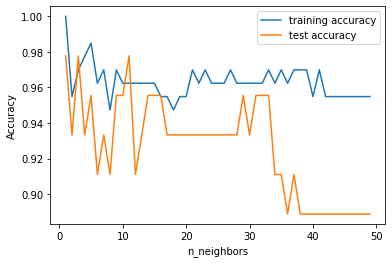

In [7]:
training_accuracy = []
test_accuracy = []
k = range(1, 50) #No hacemos K hasta 100, debido a que deja el grafico poco amigable.

for n_neighbors in k:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_trainval, y_trainval)
    #Usamos trainval, debido a que este seria nuestro set de train "Completo", sin separarlo para validar.
    training_accuracy.append(clf.score(X_trainval, y_trainval))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(k, training_accuracy, label="training accuracy")
plt.plot(k, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
_ = plt.legend()


### Justificacion
Al observar la grafica que muestra la variacion de la accuracy tanto training como test dependiendo del parametro K, se puede observar que efectivamente el mejor valor se alcanza cuando K es igual a 1, ya que con este valor para el parametro de n_neighbors, se alcanza por primera vez el punto más alto en la grafica. Luego se infiere que esto concuerda con lo expuesto en la primera pregunta, alcanzando asi una accuracy del 98%.

Sin embargo, cabe mencionar que un k=1 puede traer complicaciones para el modelo, debido a que podria ser menos estable. Esto debido a que por ejemplo, si un punto de la data esta rodeado de puntos clase 0 y solo un punto de clase 1, y justamente este punto clase 1 se encuentra más cerca del punto a predecir, el clasificador prediciria que este punto pertenece a la clase 1, lo cual seria problamente erroneo, ya que al haber más puntos clase 0 probablemente pertenezca a esa clase. Es por este motivo que para evitar problemas de estabilidad se podría optar por un k=10, la cual como se observa en la gráfica alcanza la misma accuracy de 98%.

## Pregunta 3
Usando la partición de la pregunta 1, entrene una regresión logística con regularización L1. Usando Random Search, determine el valor del hiperparámetro C. Para el valor de C seleccionado, qué atributos quedan ponderados por pesos igual a 0. Evalúe en el conjunto de prueba, entregando la matriz de confusión, accuracy, precision, recall, y F1-score. En base al resultado de accuracy, cuál clasificador (knn o regresión logística) obtiene el mejor resultado.

### Respuesta:

Size of training set: 99   size of validation set: 34   size of test set: 45

Best score on validation set: 0.29
Best parameters:  17.621772849037033 NUESTRO C SELECCIONADO
Test set score with best parameters: 0.96


MATRIZ DE CONFUSION:


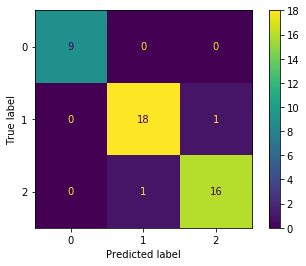

RESUMEN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45





Atributos quedan ponderados por pesos igual a 0 

coef ponderamos por pesos iguales a 0 en la clase 0:
magnesium
color_intensity


coef ponderamos por pesos iguales a 0 en la clase 1:
total_phenols


coef ponderamos por pesos iguales a 0 en la clase 2:
alcohol
proline


In [10]:
#Hacemos Naive way of Randomsearch, donde no usamos RandomSearchCV, pues usa crossvalidation

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    wine_dataset.data, wine_dataset.target, random_state=7) #Fijamos la semilla en 7.

# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=0)

# #Estandarizamos los datos:
scale = StandardScaler().fit(X_train)
X_test = scale.transform(X_test)
X_trainval= scale.transform(X_trainval)
X_train= scale.transform(X_train)


#Vemos los size de cada set
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
#Parametro C
for i in range(100):#Hacemos 100 iteraciones donde se varia el C de manera random y uniforme
    C= random.uniform(0, 100) #Establecemos el parametro C
    #Hacemos el train
    r = LogisticRegression(C=C, penalty='l1',solver='saga').fit(X_train, y_train)
    #Evaluamos en el validation set
    score=r.score(X_valid, y_valid)
    #Nos quedamos con el mejor parametro C
    if score > best_score:
            best_score = score
            best_parameters = C
    #print("score/C/i", score, C, i) #chequee si el for funcionaba correctamente y observe los scores           


    
#  #Usamos el mejor C=best_parameters y evaluamos en el test set
r = LogisticRegression(C=best_parameters, penalty='l1',solver='saga').fit(X_trainval, y_trainval)
test_score = r.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters,"NUESTRO C SELECCIONADO")
print("Test set score with best parameters: {:.2f}".format(test_score))
y_pred=r.predict(X_test)
print("\n")
print("MATRIZ DE CONFUSION:")
plot_confusion_matrix(r, X_test, y_test)
plt.show()
print('RESUMEN')
print(classification_report(y_test, y_pred))
#Veamos que coeficientes en cada clase quedan ponderamos por pesos iguales a 0:
aux=list(r.coef_) #transformamos en lista el resultado de r.coef_, donde es un arreglo con arreglos en su interior
#creamos los arreglos donde vamos a almacenar los index de cada uno de los coeficientes que sean 0.
#esto es necesario para despues sacar su nombre del wine_dataset['feature_names']
clase0=[]
clase1=[]
clase2=[]
#Creamos un for que recorre la lista aux, en busca de aquellos atributos que son 0
for j in range(3):
    for k in range(13):
        if (aux[j][k])==0:
            if j==0:
                clase0.append(k)
            if j==1:
                clase1.append(k)
            if j==2:
                clase2.append(k)
print('\n')
print('\n')
print('Atributos quedan ponderados por pesos igual a 0 \n') 
print('coef ponderamos por pesos iguales a 0 en la clase 0:')
#Hacemos que imprima el nombre del atributo que posee una ponderacion con peso igual a 0
for i in range(len(clase0)):
    aux2=wine_dataset['feature_names'][clase0[i]]
    print(aux2)
print('\n')
print('coef ponderamos por pesos iguales a 0 en la clase 1:')
for i in range(len(clase1)):
    aux2=wine_dataset['feature_names'][clase1[i]]
    print(aux2)
print('\n')
print('coef ponderamos por pesos iguales a 0 en la clase 2:')
for i in range(len(clase2)):
    aux2=wine_dataset['feature_names'][clase2[i]]
    print(aux2)

### Justificacion
Antes que todo, notemos la diferencia en la busqueda del mejor parametro en comparacion con la pregunta 1. Como sabemos GridSearch toma una grid con valores ya conocidos, por otro lado randomsearch genera numeros aletorios para testear.

En primer lugar con regulacion L1, obtenemos un parametro C= ~32.38, el cual fue obtenido por medio de un randomsearch "Naive", usando un C random uniforme entre los valores de 0 y 100, se utilizo uniform, puesto a que no se tiene conocimiento certero del efecto de C en el clasificador, por lo que al implementar una distribucion uniforme se le otorga el mismo peso a todas las posibles C's, cabe destacar que el valor del "best parameter: C" varia cada vez que se ejecuta el codigo, sin embargo esto no afecta en el accuracy obtenido.

De igual modo al final del output, se expone que atributos quedan ponderados por pesos igual a 0, en cada una de las clases, lo cual varia cada vez que se ejecuta el codigo. Se infiere que esto se debe porque "L1" prefiere sparsity, por lo que algunos de los coeficientes pueden tomar valor 0, y otros valores "grandes", como se explico en clases.

Una vez teniendo este best_parameter, este se implemento en clasificador de regresion logistica, de igual modo se utilizo el solver=saga poder ejecutar el clasificador con penalty=l1. Es asi como con este parametro C, se obtiene una accuracy del 96%.

De igual forma se visualiza como la matriz de confusion muestra resultados favorables. Al ver la prediccion para la clase 0 vemos como no exiten errores, ya que las 9 instancias fueron correctamente clasificadas. Posteriormente para el caso de la clase 1, notamos como predice que existen 19 de este tipo, no obstante unos de ellos es un error, debido a que el clasificador lo establece como clase 1 pero este realmente es clase 2. Por ultimo para la clase 2, el clasificador predice correctamente 16, y comete un error de clasificar como clase 2 a un vino que realmente era clase 1.

Observando el resumen, se establece que el clasificador actua de manera adecuada. Debido a que para la clase 0 logra clasificar todos correctamente, por lo que alcanza un 100% de precision y recall. Por otro lado las clases 1 y 2 alcanzan un 95% y 94% respectivamente en ambas metricas. Es asi como se establece que el clasificador alcanza una buena precision y recall en las tres clases, obteniendo los mejores resultados en la clase 0, luego la 1 y finalmente la 2. Por ultimo se ve el F1 Score que combina la precision y el recall, es decir nos demuestra el rendimiento combinado de ambas metricas, pero como nos enfrentamos a un caso de multiples clases, nos fijaremos particularmente en macro avg, puesto a que se considera que las tres clases de vinos del dataset poseen la misma relevancia, es asi como observamos un valor del 96% lo cual posiciona de buena manera a nuestro clasificador.

Finalmente, basandose netamente en la accuracy este seria un peor clasificador que el knn, debido a que como se expuso previamente, el clasificador knn alcanzo un valor del 98% en accuracy superando por 2% al de regresion logistica con penalty=l1.


## Pregunta 4
Repita la pregunta 3 con regularización L2

### Respuesta

Size of training set: 99   size of validation set: 34   size of test set: 45

Best score on validation set: 0.29
Best parameters:  15.44466237686921 NUESTRO C SELECCIONADO
Test set score with best parameters: 0.96
Informacion RELEVANTE:
MATRIZ DE CONFUSION:


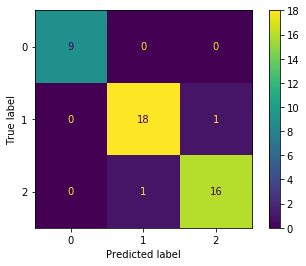

RESUMEN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.95      0.95      0.95        19
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45





Atributos quedan ponderados por pesos igual a 0 

coef ponderamos por pesos iguales a 0 en la clase 0:


coef ponderamos por pesos iguales a 0 en la clase 1:


coef ponderamos por pesos iguales a 0 en la clase 2:


Observemos como no existen coeficientes (atributos) con pesos ponderados igualados a 0:

[array([ 1.25081607,  0.36704721,  0.86476911, -1.90150209,  0.17073864,
        0.22845617,  1.03921417, -0.36426002,  0.28595861,  0.04236703,
        0.18304455,  1.0619526 ,  1.64829343]), array([-1.35451832, -0.89444304, -1.53761935,  1.16533219, -0.57196039,
        0.0981516 ,  0.43064426,  0.73

In [17]:
#Hacemos Naive way of Randomsearch, donde no usamos RandomSearchCV, pues usa crossvalidation

# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    wine_dataset.data, wine_dataset.target, random_state=7) #Fijamos la semilla en 7.

# split train+validation set into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=0)

# #Estandarizamos los datos:
scale = StandardScaler().fit(X_train)
X_test = scale.transform(X_test)
X_trainval= scale.transform(X_trainval)
X_train= scale.transform(X_train)


#Vemos los size de cada set
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
#Parametro C
for i in range(100):#Hacemos 100 iteraciones donde se varia el C de manera random y uniforme
    C= random.uniform(0, 100) #Establecemos el parametro C
    #Hacemos el train
    r = LogisticRegression(C=C, penalty='l2',solver='saga').fit(X_train, y_train)
    #Evaluamos en el validation set
    score=r.score(X_valid, y_valid)
    #Nos quedamos con el mejor parametro C
    if score > best_score:
            best_score = score
            best_parameters = C
    #print("score/C/i", score, C, i) #chequee si el for funcionaba correctamente y observe los scores           


    
 #Usamos el mejor C=best_parameters y evaluamos en el test set
r = LogisticRegression(C=best_parameters, penalty='l2',solver='saga').fit(X_trainval, y_trainval)
test_score = r.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters,"NUESTRO C SELECCIONADO")
print("Test set score with best parameters: {:.2f}".format(test_score))
print('Informacion RELEVANTE:')
y_pred=r.predict(X_test)
print("MATRIZ DE CONFUSION:")
plot_confusion_matrix(r, X_test, y_test)
plt.show()
print('RESUMEN')
print(classification_report(y_test, y_pred))

#Veamos que coeficientes en cada clase quedan ponderamos por pesos iguales a 0:
aux=list(r.coef_) #transformamos en lista el resultado de r.coef_, donde es un arreglo con arreglos en su interior
#creamos los arreglos donde vamos a almacenar los index de cada uno de los coeficientes que sean 0.
#esto es necesario para despues sacar su nombre del wine_dataset['feature_names']
clase0=[]
clase1=[]
clase2=[]
#Creamos un for que recorre la lista aux, en busca de aquellos atributos que son 0
for j in range(3):
    for k in range(13):
        if (aux[j][k])==0:
            if j==0:
                clase0.append(k)
            if j==1:
                clase1.append(k)
            if j==2:
                clase2.append(k)
print('\n')
print('\n')
print('Atributos quedan ponderados por pesos igual a 0 \n') 
print('coef ponderamos por pesos iguales a 0 en la clase 0:')
#Hacemos que imprima el nombre del atributo que posee una ponderacion con peso igual a 0
for i in range(len(clase0)):
    aux2=wine_dataset['feature_names'][clase0[i]]
    print(aux2)
print('\n')
print('coef ponderamos por pesos iguales a 0 en la clase 1:')
for i in range(len(clase1)):
    aux2=wine_dataset['feature_names'][clase1[i]]
    print(aux2)
print('\n')
print('coef ponderamos por pesos iguales a 0 en la clase 2:')
for i in range(len(clase2)):
    aux2=wine_dataset['feature_names'][clase2[i]]
    print(aux2)

#Como en este caso no hay atributos con pesos ponderados iguales a 0, pues L2 prefiere muchos pesos pequeños.
#Veamos los coeficientes
print('\n')
print('Observemos como no existen coeficientes (atributos) con pesos ponderados igualados a 0:\n')
print(aux)

### Justificacion
Podemos observar que los resultados son sumamente similares, cambiando el penalty=l2. Esto debido a que se alcanza el mismo nivel de accuracy de un 96% y de igual forma se llega a los scores en las diferentes metricas para las distintas clases, es decir el resumen es identico. Por lo que el analisis es el mismo que en la anterior pregunta.

No obstante si existen un puntos de diferenciacion, el primero de ellos es el valor que toma el parametro C, donde se evidencia como varia dependiendo del penalty utilizado. 

Asi mismo donde existe la mayor diferencia es en la cantidad de atributos que quedan ponderados por pesos igual a 0, como se ha de esperar en este caso no existen atributos con pesos ponderadoss igual a 0 en ninguna de las clases, esto debido a que "L1" prefiere sparsity, donde varios pesos son 0, y otros grandes, en cambio "L2" prefiere muchos pesos pequeños, como se puede observar en el arreglo de los coeficientes para las distintas clases al final del output anterior, donde es un arreglo con tres arreglos en su interior, donde cada uno de ellos representa una clase y los pesos para cada uno de los atributos de ella.

Finalmente, basandose netamente en la accuracy este seria un peor clasificador que el knn, debido a que como se expuso previamente, el clasificador knn alcanzo un valor del 98% en accuracy superando por 2% al de regresion logistica con penalty=l2, es decir que ambos casos donde se utiliza el clasificador de regresion logistica se obtiene la misma accuracy, por lo que se podria considerar estan empatados.

## Pregunta 5 
Considere el clasificador Linear Support Vector Machine. Utilizando el dataset completo, realice una validación cruzada de 10 dobladas estratificada, con SVC (usando valores para los hiperparámetros que trae por defecto) usando como métrica el accuracy. Qué le parece el resultado obtenido? se puede comparar el accuracy obtenido por este enfoque de validación cruzada versus los resultados de accuracy obtenidos por los enfoques hold-out usados para knn, regresión logística L1 y L2? Justifique su respuesta.

### Respuesta

In [14]:
clf = SVC() #Usamos SVC de manera default
cv = StratifiedKFold(n_splits=10) #validación cruzada de 10 dobladas estratificada
scores=cross_val_score(SVC(), wine_dataset.data, wine_dataset.target, cv=cv)
print("Accuracy con intervalo de confianza del 95%:")
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy con intervalo de confianza del 95%:
Accuracy: 0.68 (+/- 0.17)


### Justificacion
En primer lugar observamos como el clasificador SVC con una validación cruzada de 10 dobladas estratificada, alcanza una accuracy del  68% (+/- 17%) con un intervalo de confianza del 95%, por lo que se infiere que a pesar de implementar una validacion cruzada de 10 dobladas estratificadas, el clasificador SVC no posee un desempeño deseable, esto debido a que casi un tercio de las veces no lograria predecir de manera correcta.

Se deduce que esta accuracy obtenida no puede ser comparada de manera precisa con las previamente calculadas, debido a que el clasificador no fue entrenado de la misma forma. Para los casos anteriores se realizo una train set y un test set, por lo cual solo se efectuo una division de la data. Por otro lado para este caso se realizo una crossvalidation con 10 dobladas estratificadas, por lo que la data se separo en 10 grupos, para que asi el modelo haga su train y test en 10 casos separados, logrando asi que cada uno de los grupos pase a ser parte del test set eventualmente. 

Es por este motivo que la comparacion no seria justa, ya que en los casos anteriores el modelo se entreno con solo una division, y en este caso lo hizo con 10 grupos diferentes, por lo que el scoring alcanzando demuestra de mejor manera como se desempeñaria el modelo frente a una nueva data. En otras palabras este es un foque mas realista, sobre el posible desempeño del modelo, lo cual justifica el por que éste entrega un score bastante inferior en comparacion a los anteriores casos.

## Pregunta 6
Repita la pregunta 5 pero ahora con Grid-search + cross-validation para determinar el valor de C más apropiado. Mejora el accuracy resultante?

### Respuesta

In [16]:
param_grid = {'C': linspace(0.001, 10, 100)}#Usamos una grid que va desde el 0.001 hasta el 10 con 100 numeros.
# using the default scoring of accuracy:
cv = StratifiedKFold(n_splits=10) #validación cruzada de 10 dobladas estratificada
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv) #Podria ser 10 directo, pues por defecto si cv es un int se usa (Stratified)KFold
grid.fit(wine_dataset.data, wine_dataset.target)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))



Grid-Search with accuracy
Best parameters: {'C': 6.869000000000001}
Best cross-validation score (accuracy)): 0.725


### Justificacion
Al dejar de usar el parametro C como default, y buscar mediante gridsearch su mejor valor, que en este caso es ~6.87, podemos ver un aumento en la accuracy pasando de un 68% a un 72.5%, es decir un aumento de 4.5%. Este aumento es razonable, debido a que cuando el clasificador SVC es usado de manera default (pregunta 5) C toma el valor de 1, es decir no se esta implementando el parametro con su mejor valor posible, el cual es 6.87.

Nuevamente no es valido comparar este valor con las anteriores preguntas, puesto a que como se explico previamente la forma en que se entrena el modelo no es la misma. Se infiere que esta manera es más ventajosa, ya que permite que el modelo se entrene con distintos divisiones de train y test set, lo cual permite entregar una accuracy que sea más realista al momento de desempeñar el modelo con nueva data (no vista).

## Suerte!

Gracias!